In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import homogeneity_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
import scipy

# Clustering 

## Loading Datasets

In [2]:
df_mocap = pd.read_csv("data/Postures.csv").sample(10000, random_state=27)
df_mocap.replace("?", 0, inplace=True)


X_mocap = StandardScaler().fit_transform(df_mocap.drop(['Class','User'], axis=1))
y_mocap = df_mocap["Class"]

# X_train_pos, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1101)

In [3]:
df_pd = pd.read_csv("data/pd_speech_features.csv")

X_pd = StandardScaler().fit_transform(df_pd.drop(['class','id'], axis=1))
y_pd = df_pd["class"]

In [121]:
#reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
def get_kmeans_elbow(X, title):
    clusters = [x for x in range(2,10)]
    sil_scores = {}
    for cluster in tqdm(clusters):
        clusterer = KMeans(n_clusters=cluster, random_state=27)
        cluster_labels = clusterer.fit_predict(X)
        sil_score = silhouette_score(X, cluster_labels)
        sil_scores[cluster] = sil_score
    plt.plot(sil_scores.keys(), sil_scores.values())
    plt.xlabel("No. of clusters")
    plt.ylabel("Silhoutte Coefficient")
    plt.title(title)
    plt.show()


  0%|          | 0/8 [00:00<?, ?it/s]

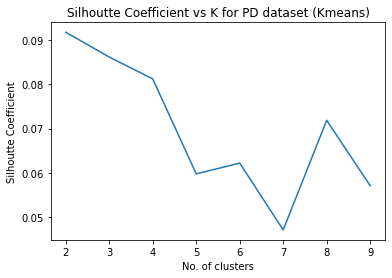

In [122]:
get_kmeans_elbow(X_pd, "Silhoutte Coefficient vs K for PD dataset (Kmeans)")

  0%|          | 0/8 [00:00<?, ?it/s]

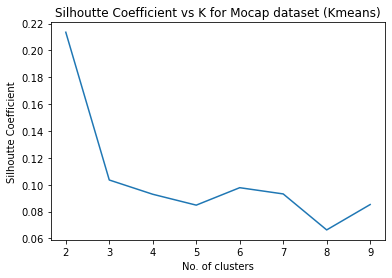

In [123]:
get_kmeans_elbow(X_mocap, "Silhoutte Coefficient vs K for Mocap dataset (Kmeans)")

In [124]:
def get_gmm_elbow(X, title):
    clusters = [x for x in range(2,10)]
    sil_scores = {}
    for cluster in tqdm(clusters):
        clusterer = GaussianMixture(n_components=cluster, random_state=27, reg_covar=1e-4)
        cluster_labels = clusterer.fit_predict(X)
        sil_score = silhouette_score(X, cluster_labels)
        sil_scores[cluster] = sil_score
    plt.plot(sil_scores.keys(), sil_scores.values())
    plt.xlabel("No. of clusters")
    plt.ylabel("Silhoutte Coefficient")
    plt.title(title)
    plt.show()

  0%|          | 0/8 [00:00<?, ?it/s]

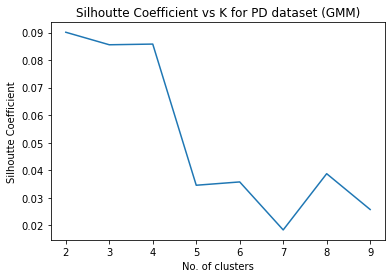

In [127]:
get_gmm_elbow(X_pd, "Silhoutte Coefficient vs K for PD dataset (GMM)")

  0%|          | 0/8 [00:00<?, ?it/s]

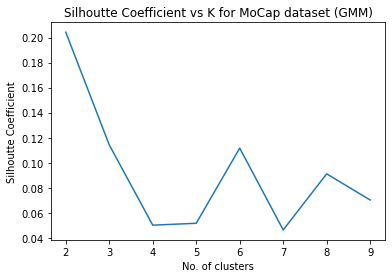

In [125]:
get_gmm_elbow(X_mocap, "Silhoutte Coefficient vs K for MoCap dataset (GMM)")

## Validating Clusters 

In [128]:
#reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

homogeneity_score(KMeans(n_clusters=2, random_state=27).fit_predict(X_mocap), y_mocap)

0.6796622268582501

In [129]:
homogeneity_score(KMeans(n_clusters=2, random_state=27).fit_predict(X_pd), y_pd)

0.0855481340859431

In [130]:
homogeneity_score(GaussianMixture(n_components=2, random_state=27, reg_covar=1e-4).fit_predict(X_mocap), y_mocap)

0.6926346611384895

In [131]:
homogeneity_score(GaussianMixture(n_components=2, random_state=27, reg_covar=1e-4).fit_predict(X_pd), y_pd)

0.09445502292496037

In [4]:
df_mocap["cluster"] = KMeans(n_clusters=2, random_state=27).fit_predict(X_mocap)
df_pd["cluster"] = KMeans(n_clusters=2, random_state=27).fit_predict(X_pd)

In [5]:
df_mocap.corr()["cluster"].abs().sort_values().index[-10:]

Index(['X1', 'X2', 'Y0', 'Class', 'Y1', 'Z0', 'Y2', 'Z1', 'Z2', 'cluster'], dtype='object')

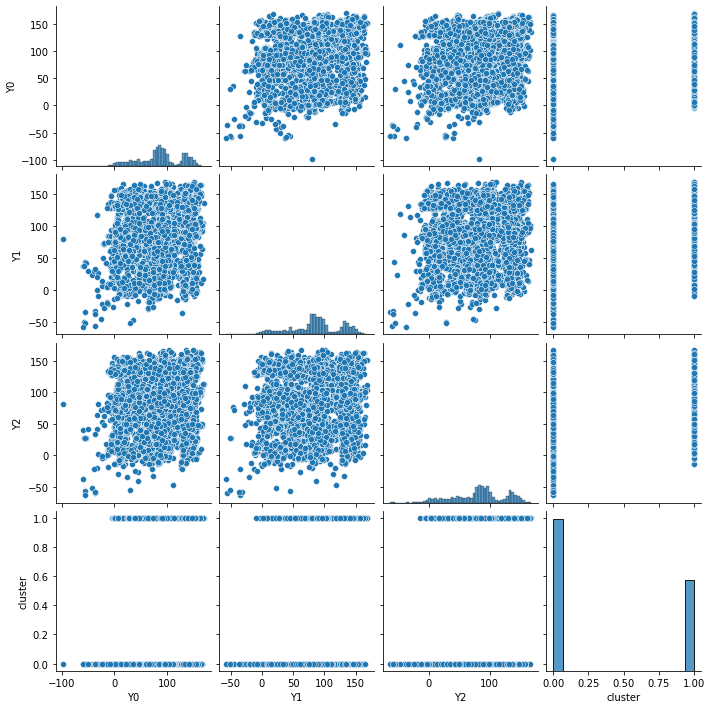

In [6]:
sns.pairplot(df_mocap[["Y0", "Y1", "Y2", "cluster"]])

In [158]:
df_pd.corr()["cluster"].abs().sort_values().index[-50:]

Index(['app_det_TKEO_mean_8_coef', 'app_det_TKEO_mean_9_coef',
       'app_det_TKEO_mean_10_coef', 'meanPeriodPulses',
       'app_LT_TKEO_std_2_coef', 'app_entropy_log_3_coef',
       'tqwt_entropy_log_dec_13', 'numPulses', 'numPeriodsPulses',
       'tqwt_entropy_log_dec_12', 'tqwt_stdValue_dec_16',
       'app_LT_TKEO_std_3_coef', 'tqwt_entropy_shannon_dec_16',
       'app_entropy_log_4_coef', 'app_LT_TKEO_mean_4_coef',
       'app_LT_entropy_log_6_coef', 'app_LT_entropy_log_7_coef',
       'app_LT_TKEO_std_4_coef', 'app_LT_entropy_shannon_1_coef',
       'app_LT_TKEO_mean_5_coef', 'app_LT_entropy_shannon_2_coef',
       'app_entropy_log_5_coef', 'app_LT_TKEO_std_5_coef',
       'app_entropy_log_10_coef', 'app_LT_entropy_shannon_3_coef',
       'app_entropy_log_8_coef', 'app_entropy_log_9_coef',
       'app_LT_entropy_log_10_coef', 'app_LT_entropy_log_9_coef',
       'app_LT_entropy_shannon_8_coef', 'app_LT_entropy_log_8_coef',
       'app_LT_entropy_shannon_9_coef', 'app_LT_entropy

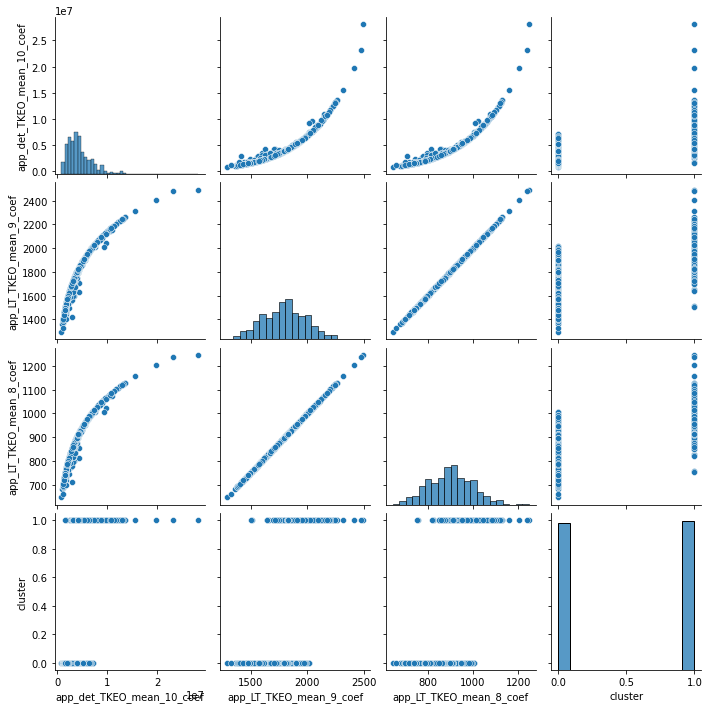

In [159]:
sns.pairplot(df_pd[[
       'app_det_TKEO_mean_10_coef',
       'app_LT_TKEO_mean_9_coef',
       'app_LT_TKEO_mean_8_coef', 'cluster']])

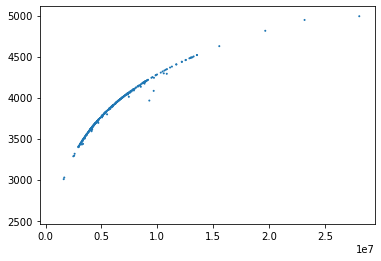

In [173]:
plt.scatter(df_pd['app_det_TKEO_mean_10_coef'], df_pd['app_LT_TKEO_mean_10_coef'], df_pd["cluster"])

In [11]:
import plotly.express as px
fig = px.scatter_3d(df_mocap, x='Y2', y='Y1', z='Class',
              color='cluster')
fig.show()

In [12]:
import plotly.express as px
fig = px.scatter_3d(df_pd, x='app_det_TKEO_mean_10_coef', y='app_LT_TKEO_mean_10_coef', z='class',
              color='cluster')
fig.show()

# DimRed

## PCA

In [22]:
def get_pca(X, limit, title):
    exp = {}
    for i in range(1, limit+1):
        pca = PCA(n_components=i)
        pca.fit(X)
        exp[i] = sum(pca.explained_variance_ratio_)
    plt.plot(exp.keys(), exp.values())
    plt.xlabel("No. of components")
    plt.ylabel("Explained Variance Ratio")
    plt.title(title)
    plt.show()

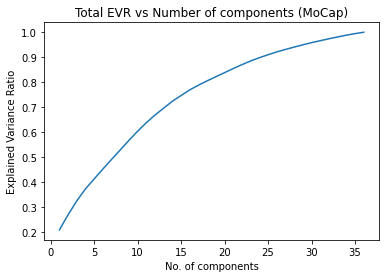

In [29]:
get_pca(X_mocap, 36, "Total EVR vs Number of components (MoCap)")

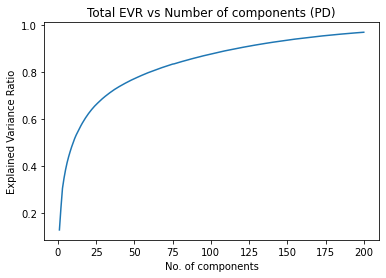

In [26]:
get_pca(X_pd, 200, "Total EVR vs Number of components (PD)")

## ICA

In [49]:
import numpy as np
def get_ica(X, limit, title):
    exp = {}
    for i in range(1, limit+1):
        pca = FastICA(n_components=i, random_state=27).fit_transform(X)
        exp[i] = np.mean(scipy.stats.kurtosis(pca))
    plt.plot(exp.keys(), exp.values())
    plt.xlabel("No. of components")
    plt.ylabel("Average Kurtosis")
    plt.title(title)
    plt.show()

/Users/aish/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/Users/aish/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/Users/aish/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/Users/aish/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.



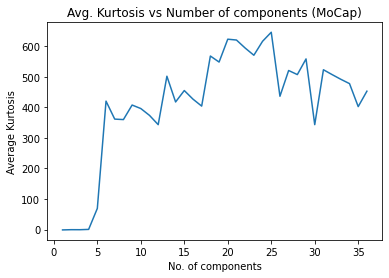

/Users/aish/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/Users/aish/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/Users/aish/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/Users/aish/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/Users/aish/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning:

FastICA did not converge. Consider increasing toleranc

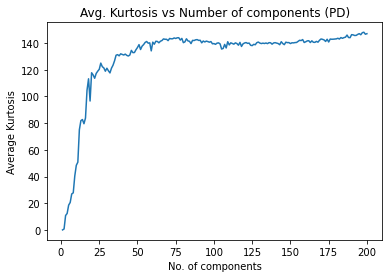

In [50]:
get_ica(X_mocap, 36, "Avg. Kurtosis vs Number of components (MoCap)")
get_ica(X_pd, 200, "Avg. Kurtosis vs Number of components (PD)")

## RCA

In [63]:
from sklearn.random_projection import GaussianRandomProjection
import numpy as np
from sklearn.metrics import mean_squared_error


In [64]:
def get_rca(X, limit, title):
    exp = {}
    for i in range(1, limit+1):
        rca = GaussianRandomProjection(n_components=i, random_state=44)
        x_rca = rca.fit_transform(X)

        reconstructed = np.dot(x_rca, np.linalg.pinv(rca.components_.T))
        rc_err = mean_squared_error(X, reconstructed)    
        exp[i] = rc_err   

    plt.plot(exp.keys(), exp.values())
    plt.xlabel("No. of components")
    plt.ylabel("Reconstruction Error")
    plt.title(title)
    plt.show()

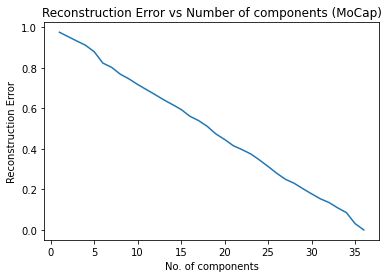

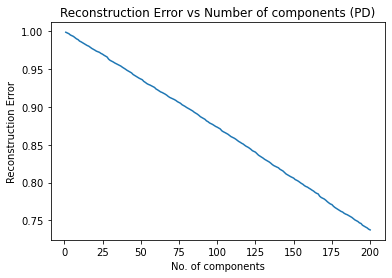

In [65]:
get_rca(X_mocap, 36, "Reconstruction Error vs Number of components (MoCap)")
get_rca(X_pd, 200, "Reconstruction Error vs Number of components (PD)")